In [1]:
#Activity 3: Linear Regression - Least Squares

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
tr_path = './data/train.csv'

In [4]:
data = pd.read_csv(tr_path)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#3.1 Max number of colummns
ans1 = len(data.columns)
print(ans1)

81


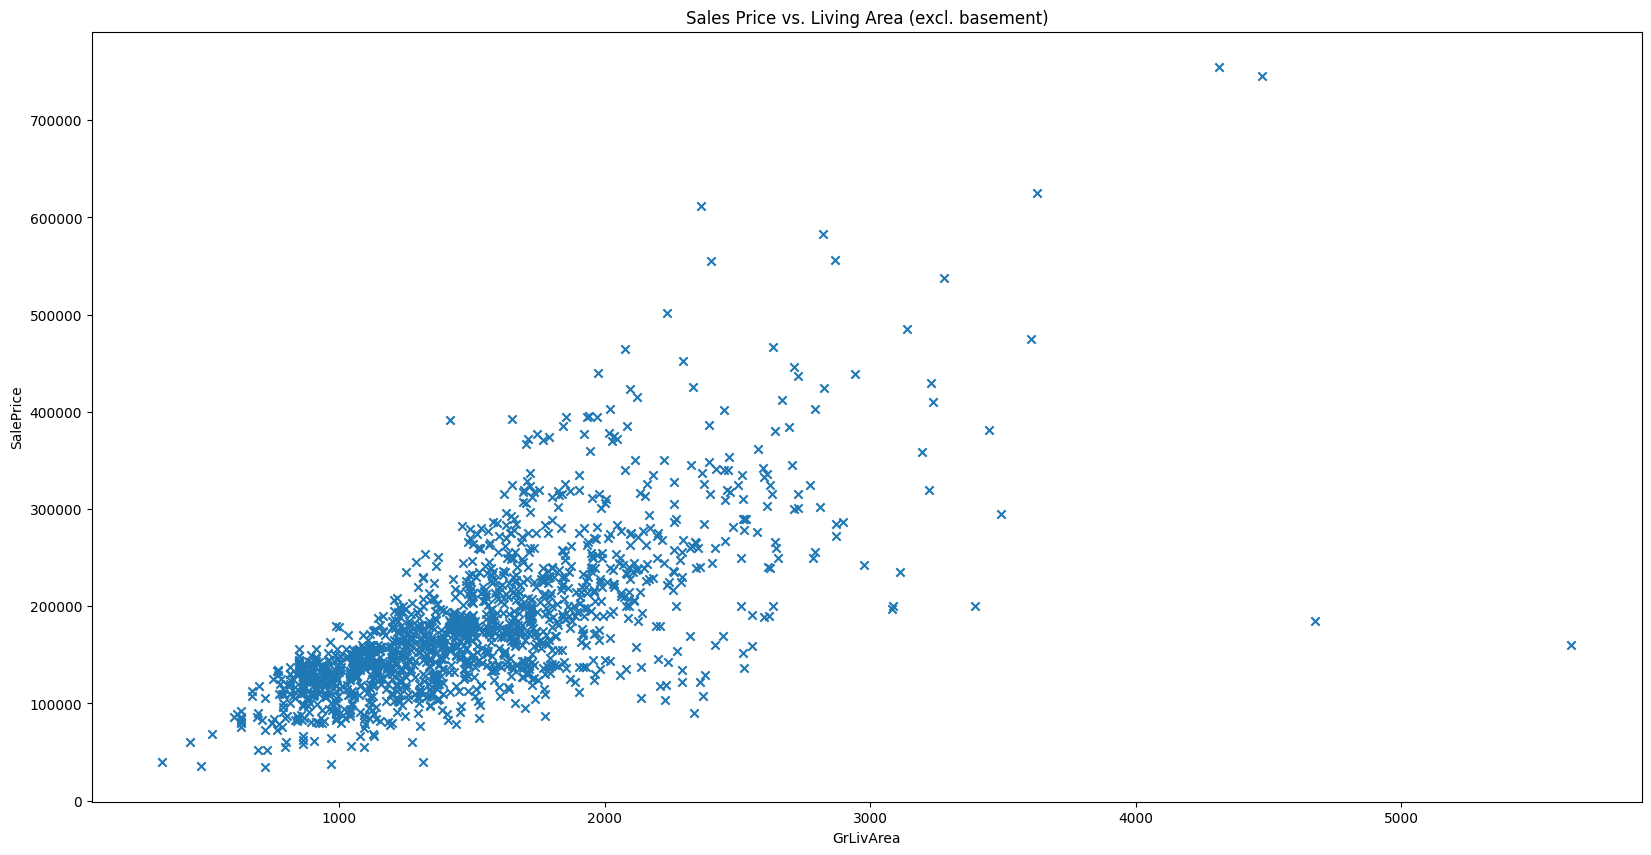

In [8]:
### Podemos graficar los datos price vs living area - Matplotlib

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Anotaciones
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

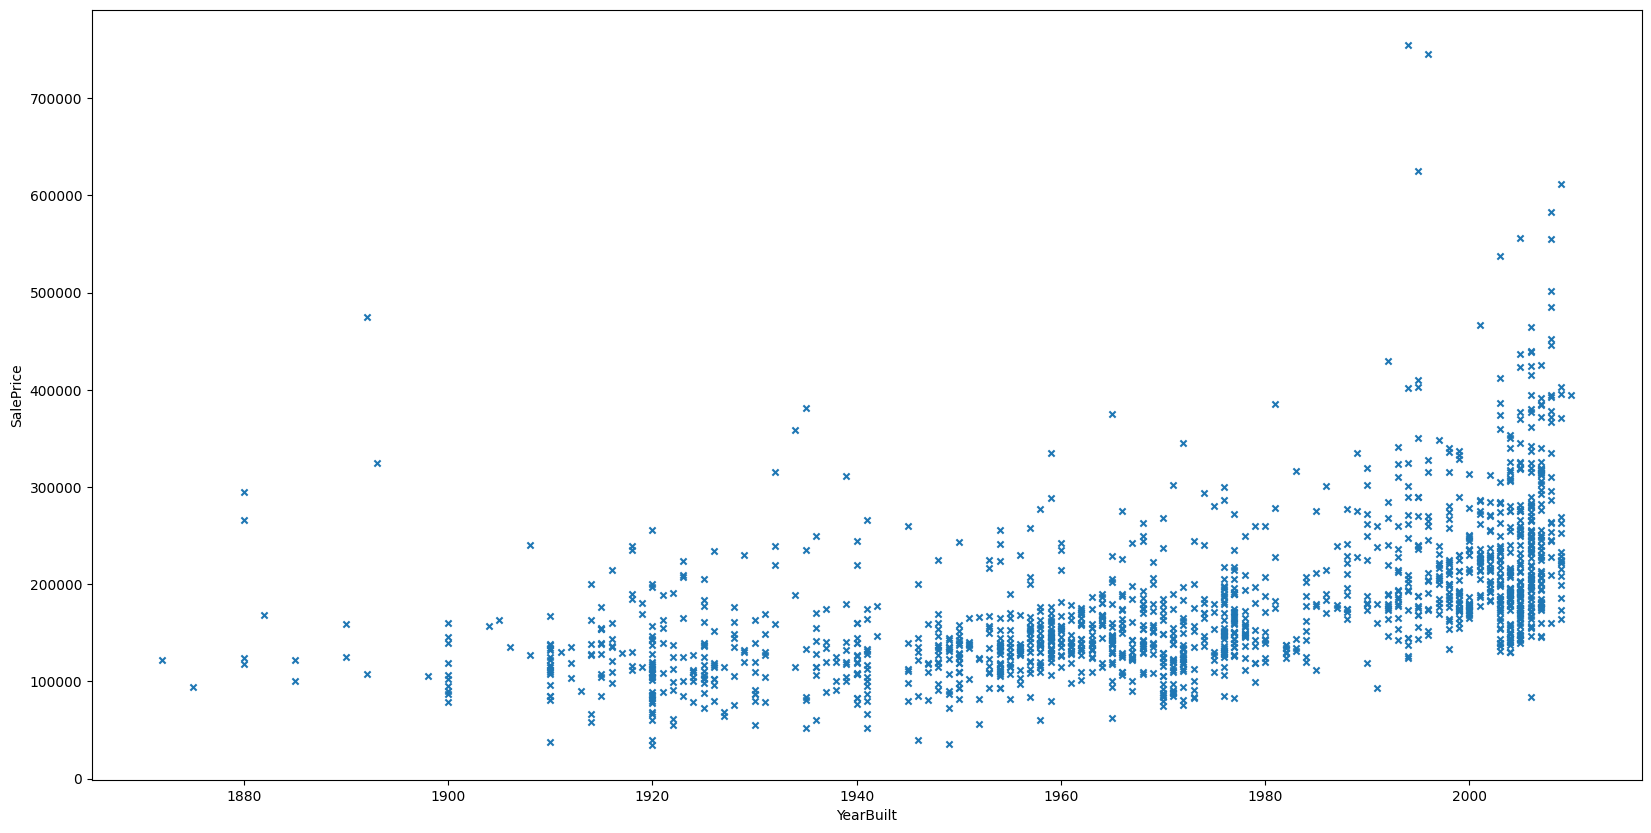

In [9]:
### price vs year - Pandas

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [10]:
#3.2 Inverse or a matrix
def inverse_of_matrix(matrix):
    inverse = np.linalg.inv(matrix)
    return inverse

In [11]:
sample_matrix = [[1, 2], [3, 4]]
the_inverse = inverse_of_matrix(sample_matrix)
print(the_inverse)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [12]:
#3.3 Read CSV function and transform it to a dataframe
def read_to_df(file_path):
#Input a csv to output a df
    df = pd.read_csv(file_path)
    return df

In [13]:
#Test
dataframe = read_to_df(tr_path)
print (dataframe)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [14]:
#3.4 Extract columns
def select_columns(data_frame, column_names):
    return data_frame[column_names]

In [15]:
#Test
selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
sub_df = select_columns(dataframe,selected_columns)
print (sub_df)

      SalePrice  GrLivArea  YearBuilt
0        208500       1710       2003
1        181500       1262       1976
2        223500       1786       2001
3        140000       1717       1915
4        250000       2198       2000
...         ...        ...        ...
1455     175000       1647       1999
1456     210000       2073       1978
1457     266500       2340       1941
1458     142125       1078       1950
1459     147500       1256       1965

[1460 rows x 3 columns]


In [16]:
#3.5 filter int columns with arrays, column, min, max
def column_cutoff(data_frame, cutoffs):
#Generate boolean mask (np.ones generates a new array until the last column with True values)
    boolmask = np.ones(len(data_frame), dtype=bool)
    #Iterate each tuple (cutoffs) that will need 3 values, column name, min value and max value
    for column_name, min_value, max_value in cutoffs:
        boolmask = boolmask & (data_frame[column_name] >= min_value) & (data_frame[column_name] <= max_value)
    return data_frame[boolmask]

In [17]:
#Test 1 selected_data function
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
selected_data = column_cutoff(sub_df, cutoffs)
print(selected_data)

      SalePrice  GrLivArea  YearBuilt
0        208500       1710       2003
1        181500       1262       1976
2        223500       1786       2001
3        140000       1717       1915
4        250000       2198       2000
...         ...        ...        ...
1455     175000       1647       1999
1456     210000       2073       1978
1457     266500       2340       1941
1458     142125       1078       1950
1459     147500       1256       1965

[1451 rows x 3 columns]


In [18]:
#Test 2 selected_data function
max_values = selected_data.max()
min_values = selected_data.min()
print("Max values:\n",max_values)
print("-"*15)
print("Min values:\n",min_values)

Max values:
 SalePrice    625000
GrLivArea      3627
YearBuilt      2010
dtype: int64
---------------
Min values:
 SalePrice    52000
GrLivArea      438
YearBuilt     1872
dtype: int64


In [19]:
#3.6 Least squares
def least_squares_weights(input_x, target_y):
    # Add transpose to input arrays
    input_x = input_x.T
    target_y = target_y.T
    #Generate values
    # hp.hstack stacks arrays in a horizontal sequence, wich means it places them as columns, then using np.ones we generate a column of 1
    #This column is needed to generate "The bias term" required on the linear regresion
    X = np.hstack((np.ones((input_x.shape[0], 1)), input_x))
    #Transpose X to get the first term
    X_transpose = np.transpose(X)
    #First expression (term) before transpose
    XtX = np.dot(X_transpose, X)
    #elevate to -1 (inverse)
    XtX_inverse = np.linalg.inv(X.T.dot(X))
    #Second term / scalar products
    XtY = np.dot(X_transpose, target_y)
    weights = np.dot(XtX_inverse, XtY)
    return weights


In [20]:
#Test
training_y = np.array([[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]])
training_x = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
                       [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
weights = least_squares_weights(training_x, training_y)
print(weights)
print(weights[1][0])

[[-2.29223802e+06]
 [ 5.92536529e+01]
 [ 1.20780450e+03]]
59.25365290008935


In [21]:
test_path = './Data/train.csv'
df = read_to_df(test_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)
X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


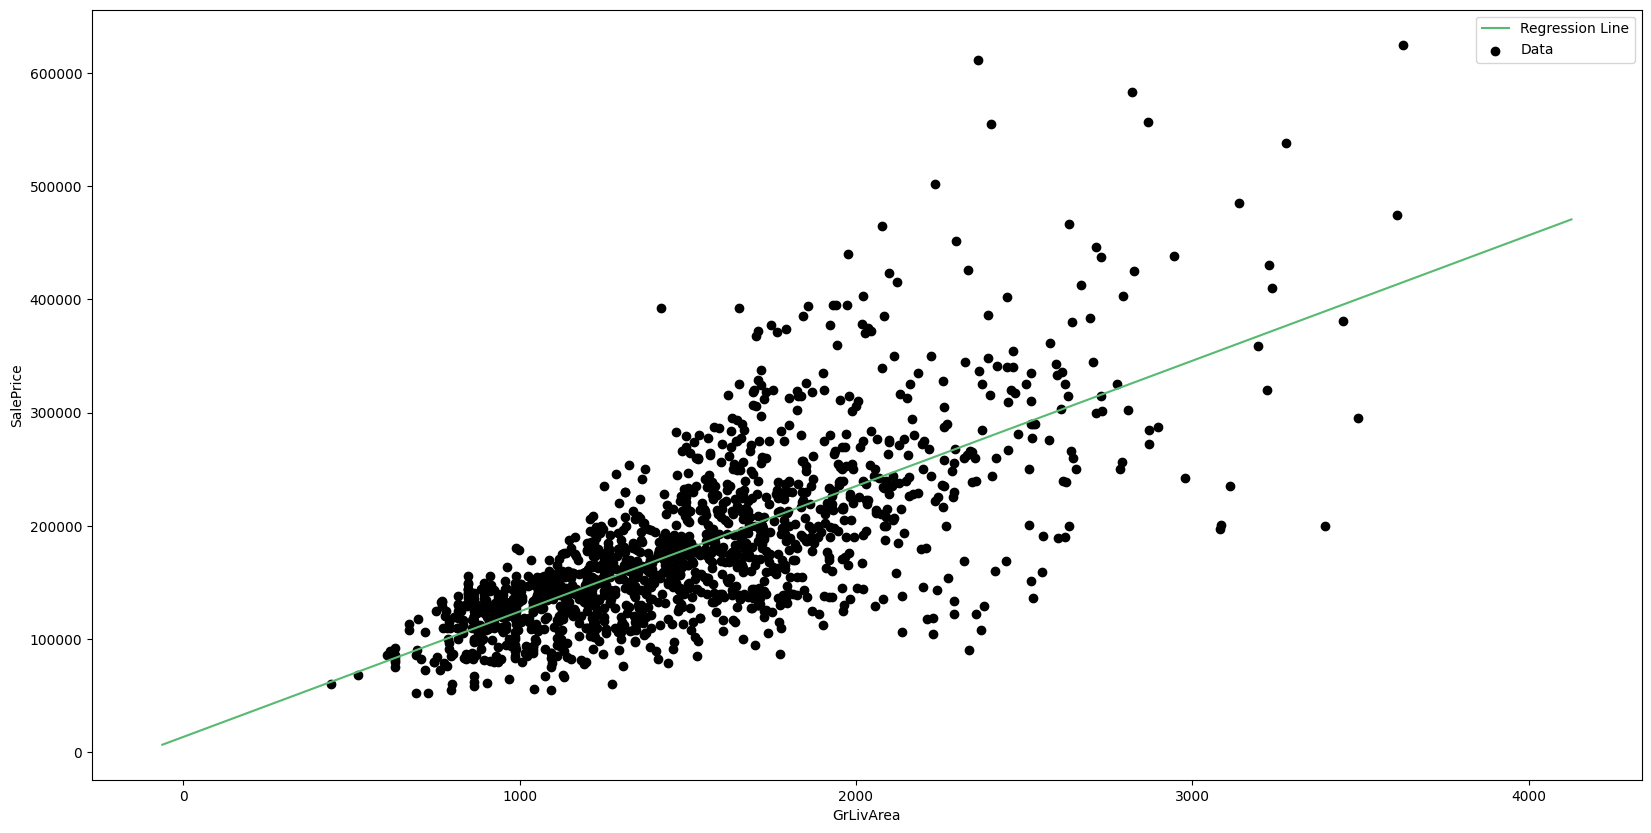

In [22]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [23]:
#sklearn comprobation
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### SKLearn requiere un array 2-dimensional X y 1 dimensional y.
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758683
Coefficient: [110.78992341]
